In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [3]:
dataset=pd.read_csv('/kaggle/input/wine-reviews/winemag-data_first150k.csv',index_col=0)
dataset1=pd.read_csv('/kaggle/input/wine-reviews/winemag-data-130k-v2.csv',index_col=0)
wine=pd.concat([dataset,dataset1],axis=0)
print('the number of rows are:',wine.shape)

the number of rows are: (280901, 13)


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 30.0+ MB


In [5]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [6]:
wine.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,280900,756,Pinot Noir,27563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winery,280901,19186,Williams Selyem,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN


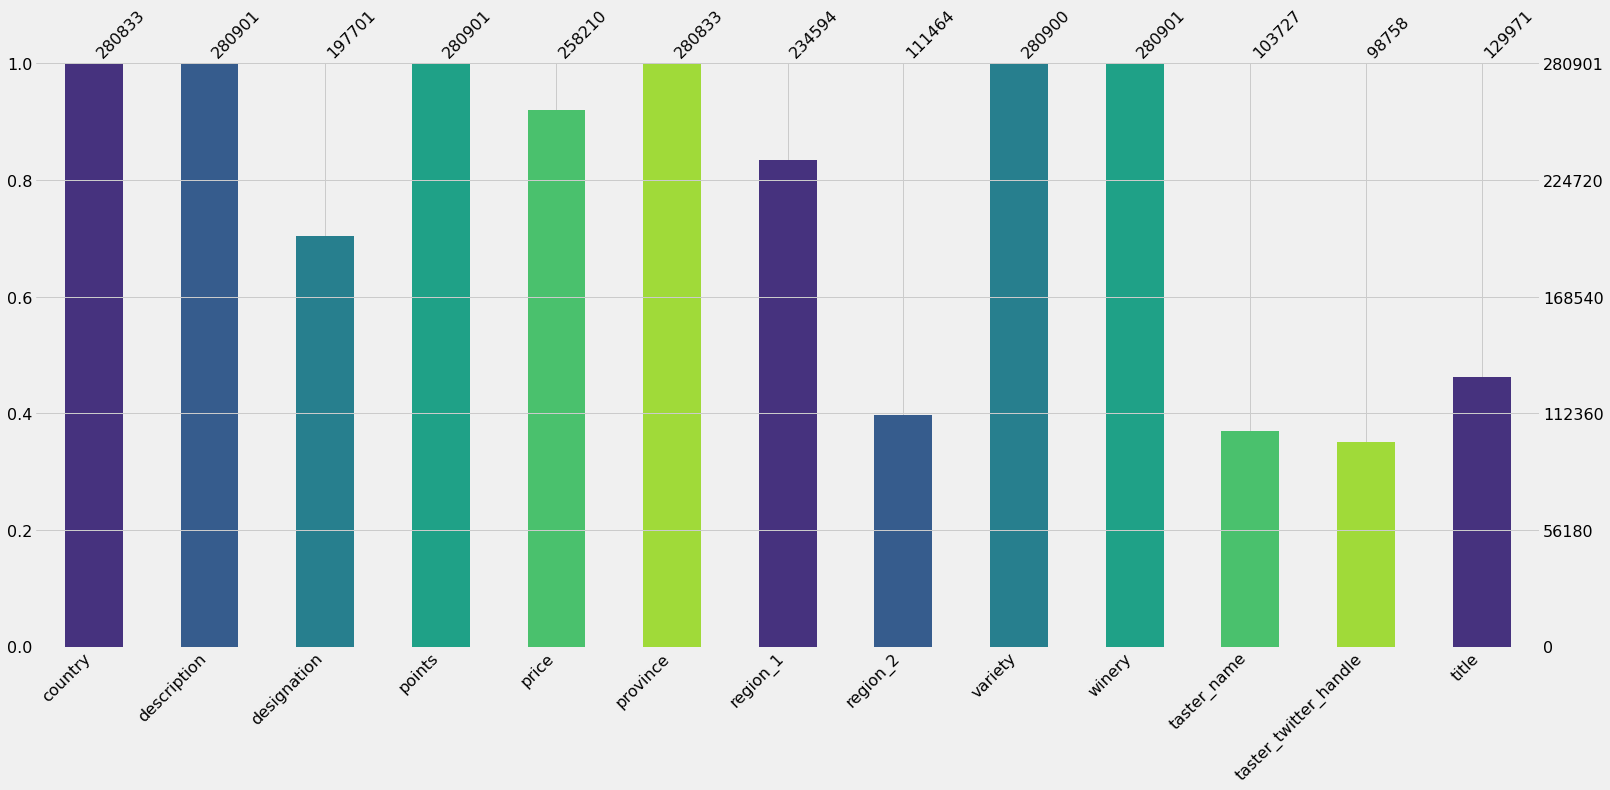

In [7]:
msno.bar(wine,color=sns.color_palette('viridis'))

*wine review by top 20 countries*

number of country list in data 50


Text(0.5, 1.0, 'distribution of wine reviews by top 20 countries')

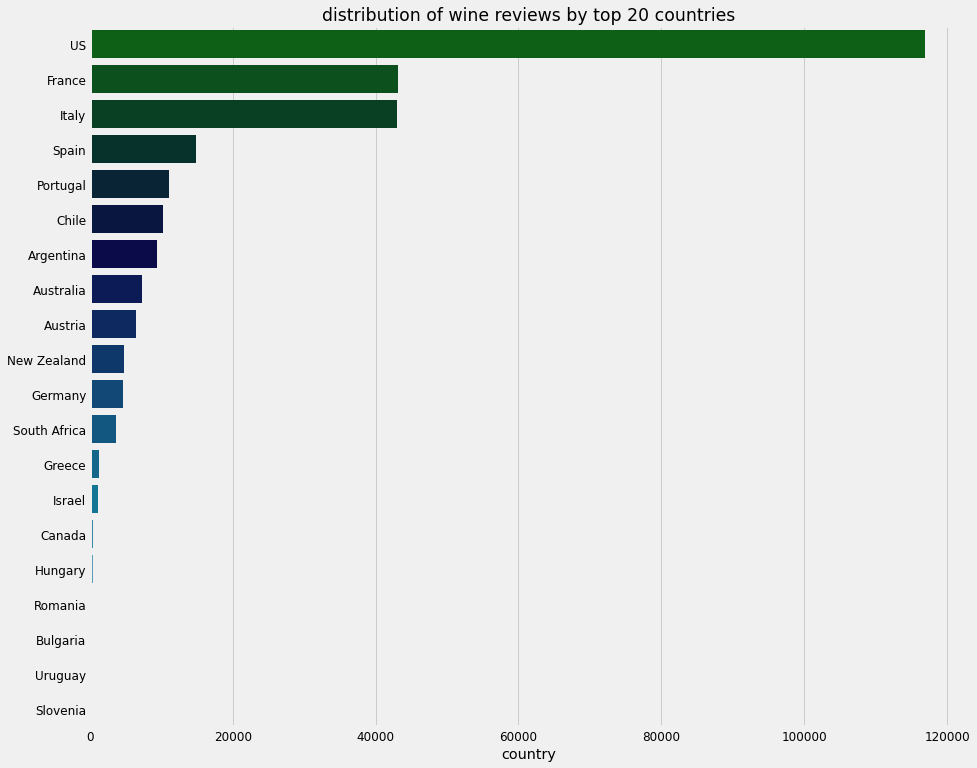

In [8]:
print('number of country list in data',wine['country'].nunique())
plt.figure(figsize=(14,12))
cnt=wine['country'].value_counts().to_frame()[0:20]
sns.barplot(x=cnt['country'], y=cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('distribution of wine reviews by top 20 countries')


*Distribution Of Wine Price*

Text(0.5, 1.0, 'boxplot of price')

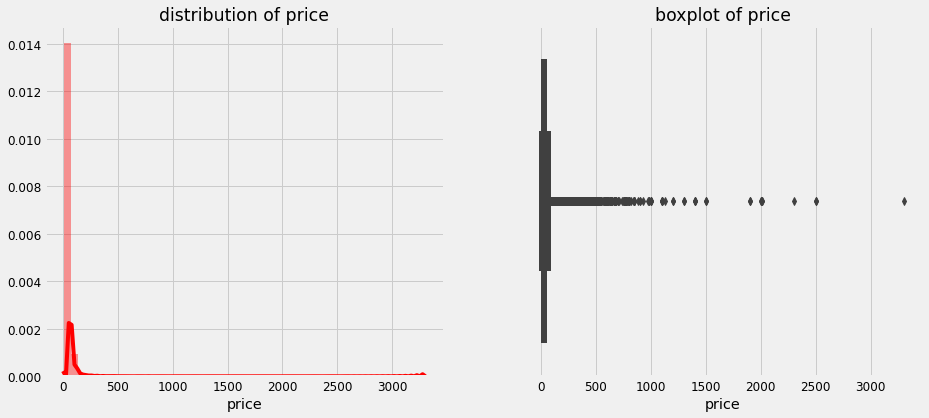

In [9]:
f,ax=plt.subplots(1,2,figsize=(14,6))
ax1,ax2=ax.flatten()

sns.distplot(wine['price'].fillna(wine['price'].mean()), color='r',ax=ax1)
ax1.set_title('distribution of price')

sns.boxplot(x=wine['price'],ax=ax2)
ax2.set_ylabel('')
ax2.set_title('boxplot of price')

*country wise average wine price*

Text(0, 0.5, 'country')

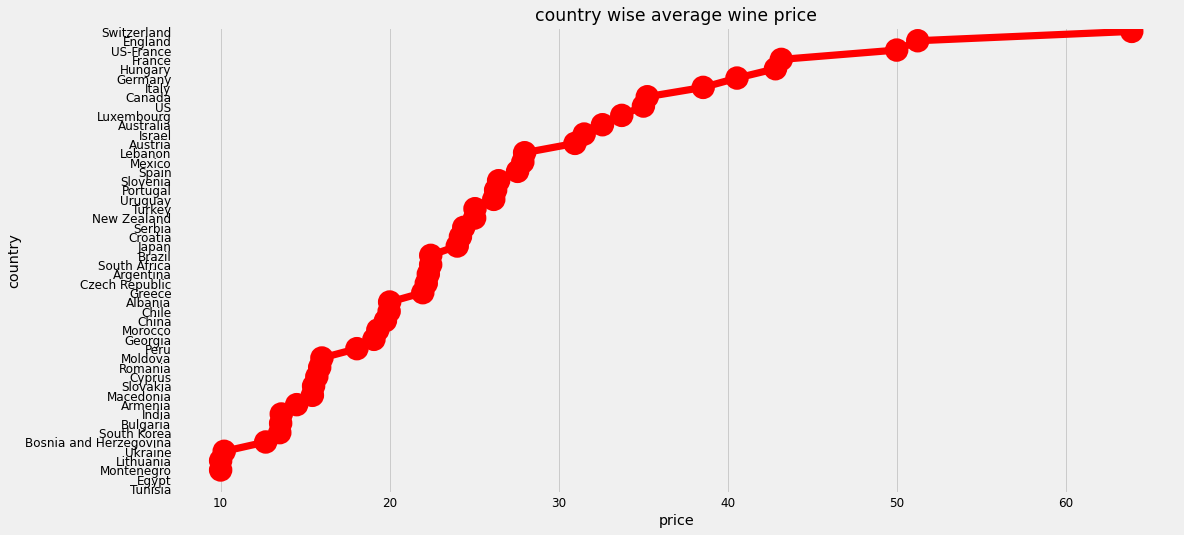

In [10]:
cnt=wine.groupby(['country'])['price'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x=cnt['price'], y=cnt.index, color='r',orient='h',markers='o')
plt.title('country wise average wine price')
plt.xlabel('price')
plt.ylabel('country')


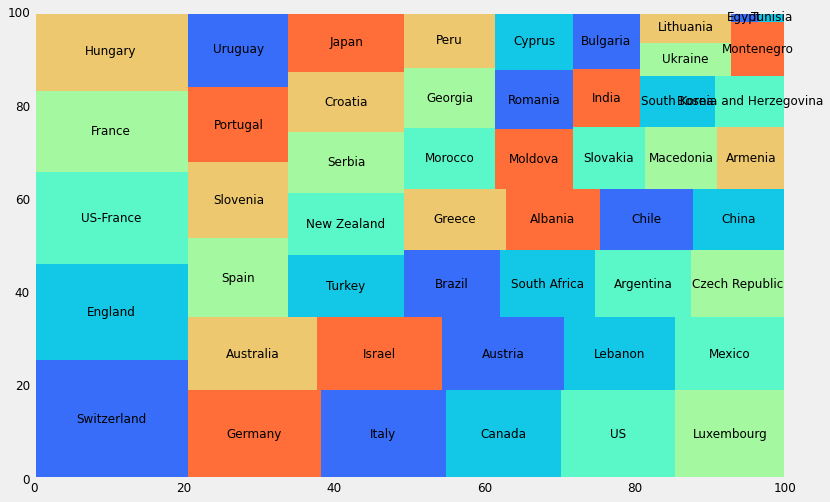

In [11]:
cnt=wine.groupby(['country'])['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))

squarify.plot(cnt['price'].fillna(1),color=sns.color_palette('rainbow'),label=cnt.index)

*country wise most expensive and least expensive wines*

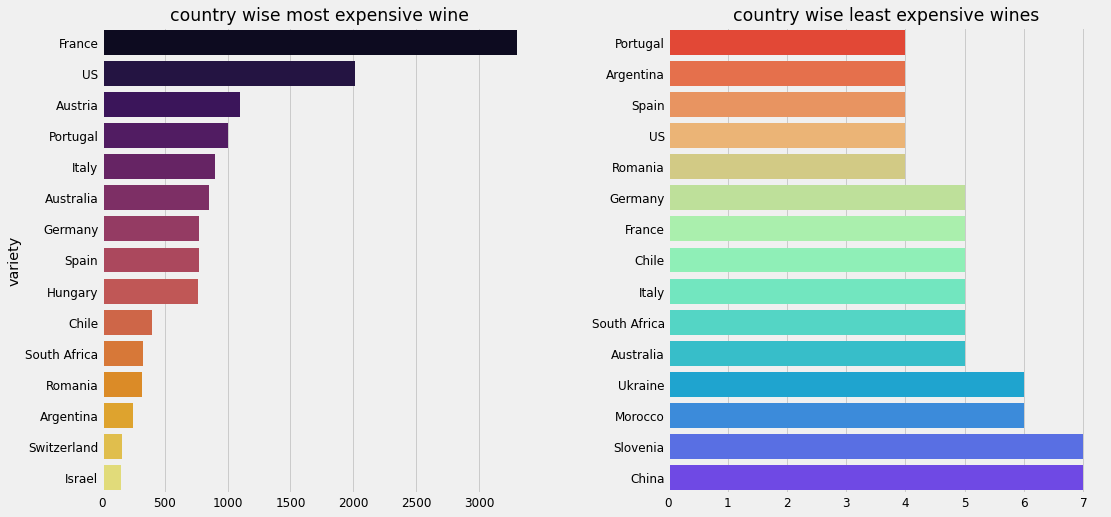

In [12]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt=wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y= cnt.index, data=cnt, palette='inferno',ax=ax1)
ax1.set_title('country wise most expensive wine')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt= wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, data=cnt, palette='rainbow_r', ax=ax2)
ax2.set_title('country wise least expensive wines')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

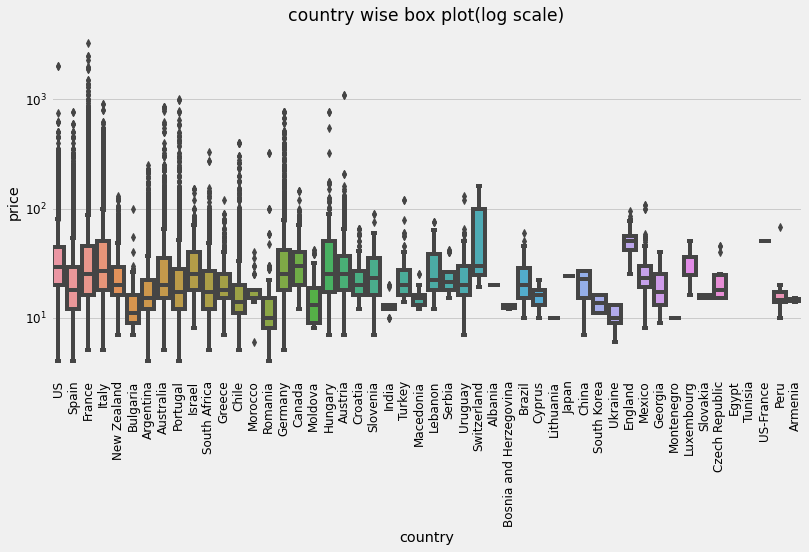

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x=wine['country'], y=wine['price'])
plt.yscale('log')
plt.title('country wise box plot(log scale)')
plt.xticks(rotation=90)

*average rating- country wise*

Text(0, 0.5, 'countries')

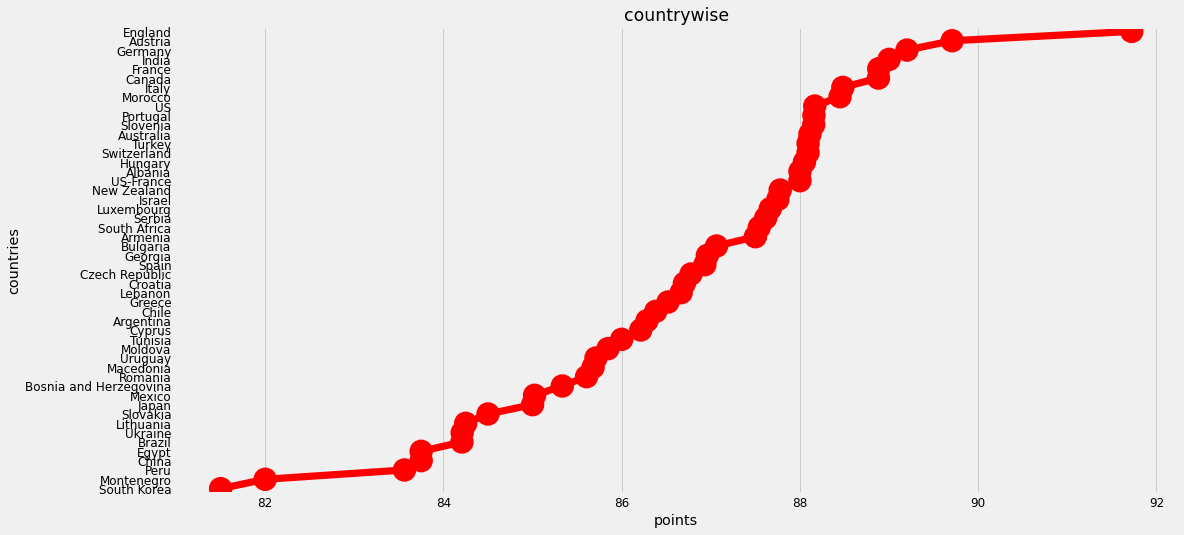

In [14]:
cnt=wine.groupby(['country'])['points'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(16,8))

sns.pointplot(x=cnt['points'], y=cnt.index, data=cnt, color='r', orient='h')
plt.title('countrywise')
plt.xlabel('points')
plt.ylabel('countries')


*countrywise highest rated and least rated wine*

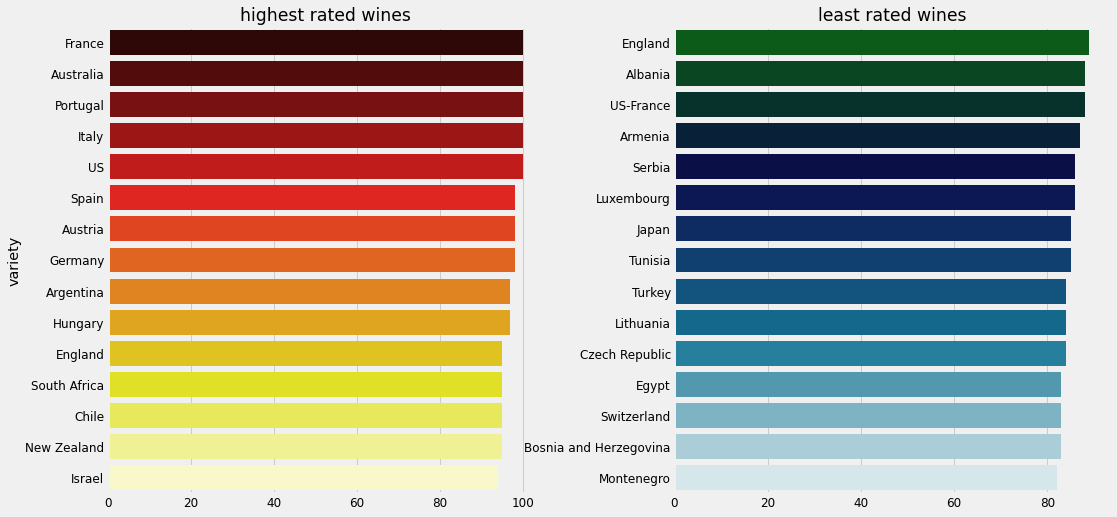

In [15]:
fig,ax= plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt= wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='hot', ax=ax1)
ax1.set_title('highest rated wines')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt=wine.groupby(['country'])['points'].min().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='ocean', ax=ax2)
ax2.set_title('least rated wines')
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.3)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

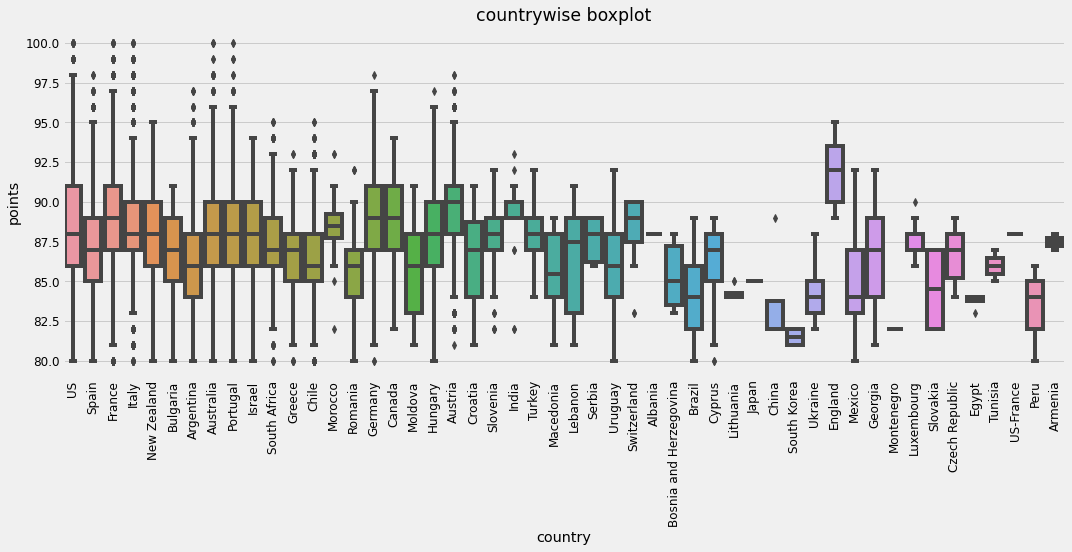

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(x=wine['country'], y=wine['points'])
plt.title('countrywise boxplot')
plt.xticks(rotation=90)


**defining relations between price and points**

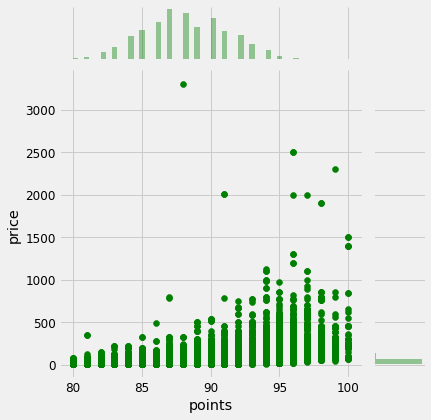

In [17]:
sns.jointplot(x=wine['points'], y=wine['price'], color='g')

*top most wine by variety*

number of variety of wines 756


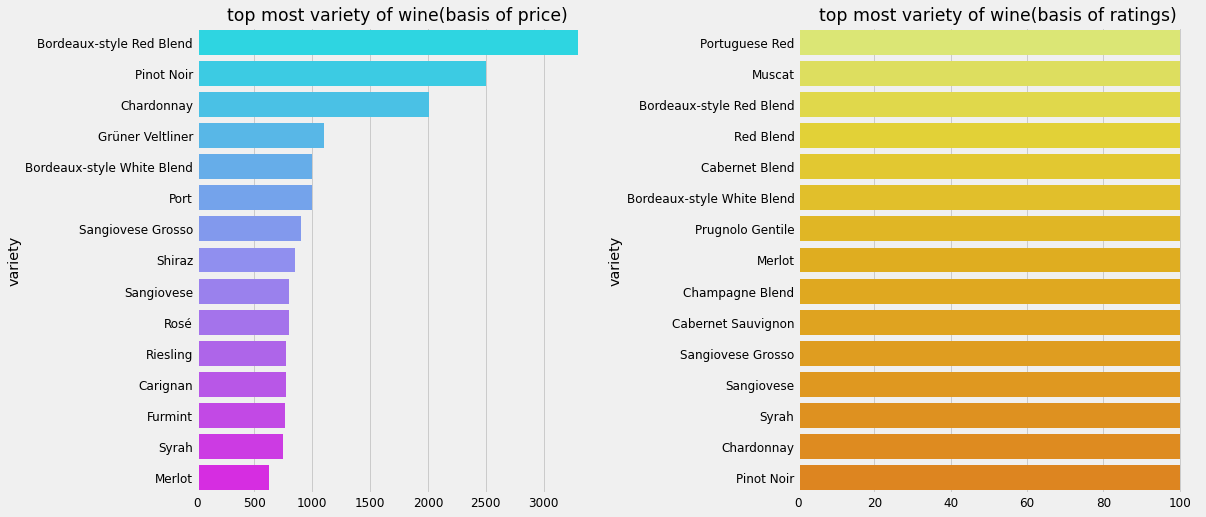

In [18]:
print('number of variety of wines',wine['variety'].nunique())
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt=wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, palette='cool', ax=ax1)
ax1.set_title('top most variety of wine(basis of price)')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt=wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, palette='Wistia', ax=ax2)
ax2.set_title('top most variety of wine(basis of ratings)')
ax2.set_ylabel('variety')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.5)

number of variety of wines 756


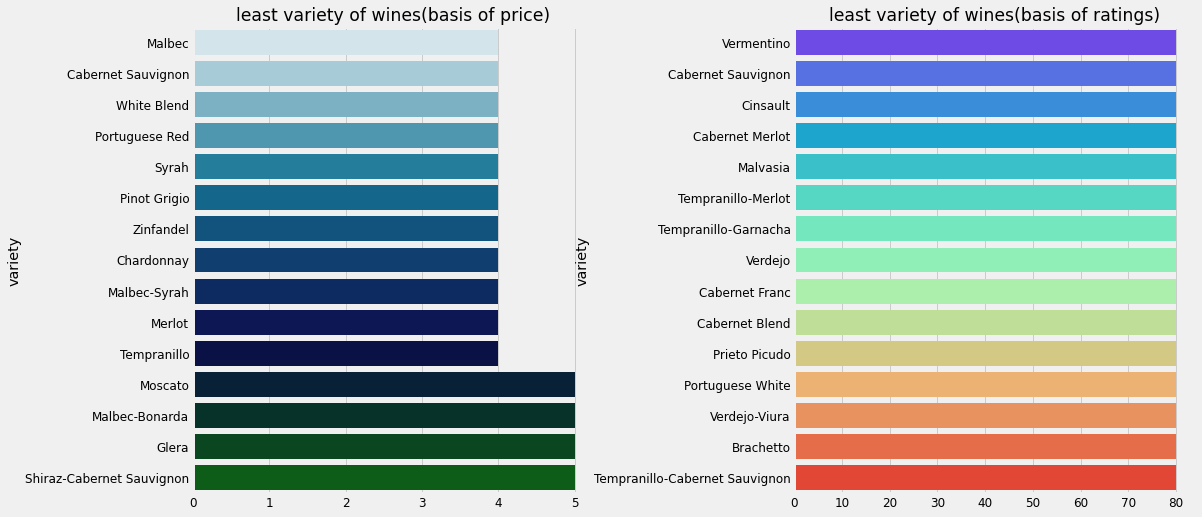

In [19]:
print('number of variety of wines',wine['variety'].nunique())
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt=wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, palette='ocean_r', ax=ax1)
ax1.set_title('least variety of wines(basis of price)')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt=wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, palette='rainbow', ax=ax2)
ax2.set_title('least variety of wines(basis of ratings)')
ax2.set_ylabel('variety')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.5)

In [20]:
cnt=wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='coolwarm',high=0.5)


,country,points,count,min,max,mean
0,France,100,12,150.000000,1500.000000,877.583333
1,Germany,98,1,775.000000,775.000000,775.000000
2,France,99,10,159.000000,2300.000000,632.400000
3,Australia,99,2,300.000000,850.000000,575.000000
4,Portugal,100,2,450.000000,650.000000,550.000000
5,France,98,43,70.000000,1900.000000,448.813953
6,Spain,98,3,440.000000,450.000000,446.666667
7,Germany,97,16,245.000000,775.000000,392.562500
8,Portugal,99,3,268.000000,426.000000,373.333333
9,Italy,100,11,195.000000,550.000000,334.545455


**Designation**-*On the basis of points and prices*

Text(0.5, 1.0, 'Most expensive wine prepared by wineyard')

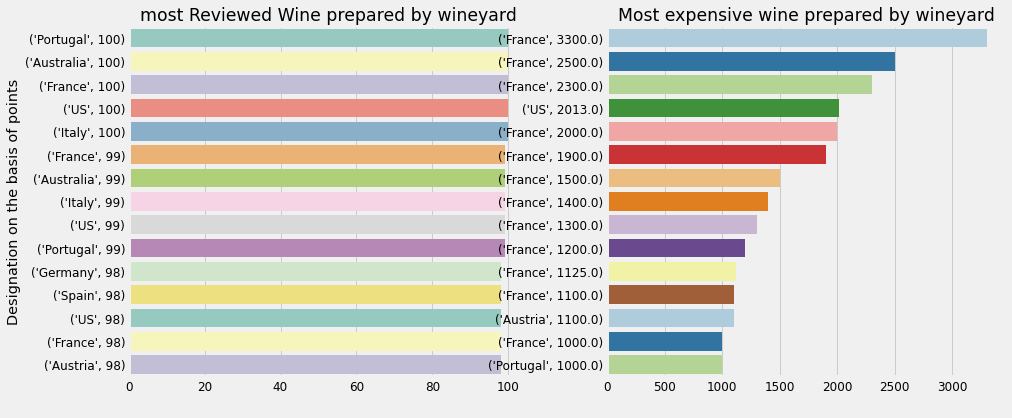

In [21]:

f,ax=plt.subplots(1,2,figsize=(14,6))
ax1,ax2=ax.flatten()

cnt=wine.groupby(['country','points'])['points'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='Set3',ax=ax1)
ax1.set_xlabel(' ')
ax1.set_ylabel('Designation on the basis of points')
ax1.set_title('most Reviewed Wine prepared by wineyard')

cnt=wine.groupby(['country','price'])['price'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, data=cnt, palette='Paired', ax=ax2)
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')
ax2.set_title('Most expensive wine prepared by wineyard')

**Winery**

Number of winerys: 19186


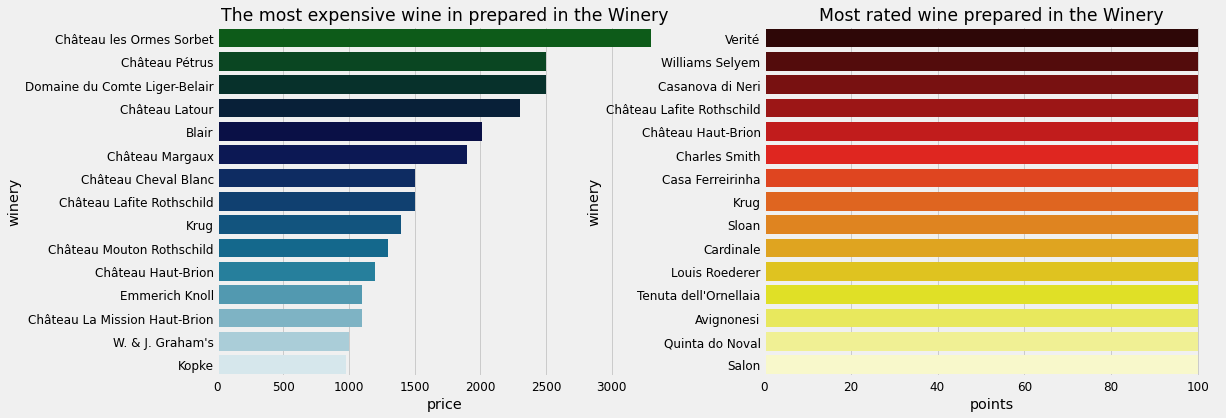

In [22]:
print('Number of winerys:',wine['winery'].nunique())
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()
cnt = wine.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:15]
sns.barplot(cnt['price'],y = cnt.index,palette = 'ocean',ax = ax1)
ax1.set_title('The most expensive wine in prepared in the Winery')
cnt = wine.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'hot')
plt.title('Most rated wine prepared in the Winery');

number of Province 490


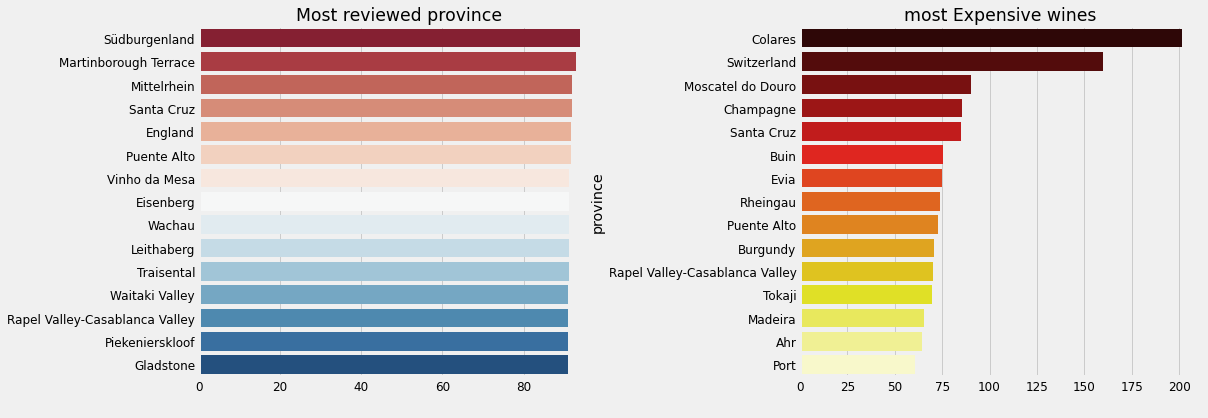

In [23]:
print('number of Province',wine['province'].nunique())
f,ax=plt.subplots(1,2,figsize=(16,6))
ax1,ax2=ax.flatten()
cnt=wine.groupby(['province'])['points'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='RdBu', ax=ax1)
ax1.set_title('Most reviewed province')
ax1.set_ylabel('')
ax1.set_xlabel(' ')

cnt=wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, data=cnt,palette='hot', ax=ax2)
ax2.set_title('most Expensive wines')
ax2.set_xlabel(' ')

plt.subplots_adjust(wspace=0.5)

number of Province 490


Text(0.5, 1.0, 'average price of wine')

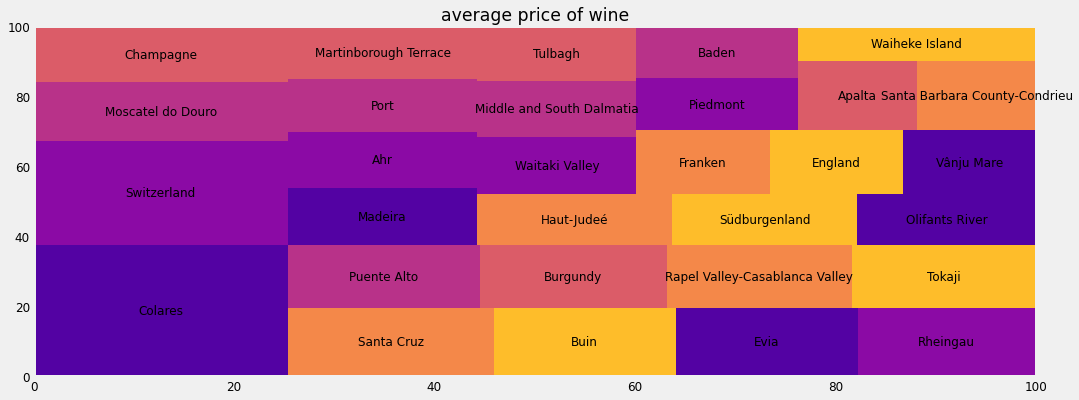

In [24]:
print('number of Province',wine['province'].nunique())
cnt=wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,6))
squarify.plot(cnt['price'].fillna(0.001), label=cnt.index, color= sns.color_palette('plasma'))
plt.title('average price of wine')


**Region-1**

Text(0.5, 1.0, 'Average Wine Prices')

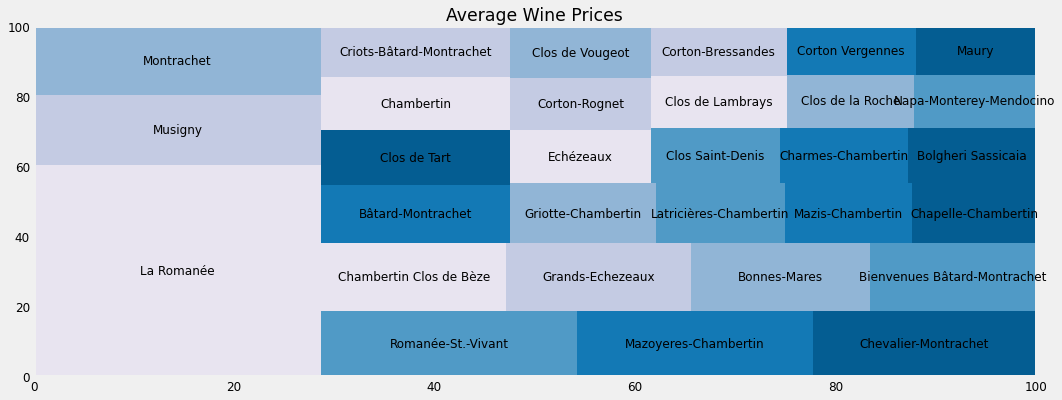

In [25]:
cnt=wine.groupby(['region_1'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,6))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index, data=cnt, color=sns.color_palette('PuBu'))
plt.title('Average Wine Prices')

In [26]:
cnt=wine.groupby(['country','province','points','region_1'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:20]
cnt.reset_index(inplace=True)
cnt.style.highlight_max()

,country,province,points,region_1,count,min,max,mean
0,France,Bordeaux,99,Pauillac,1,2300.000000,2300.000000,2300.000000
1,France,Burgundy,96,La Romanée,2,2000.000000,2500.000000,2250.000000
2,France,Bordeaux,100,Saint-Émilion,1,1500.000000,1500.000000,1500.000000
3,France,Bordeaux,100,Pauillac,1,1500.000000,1500.000000,1500.000000
4,France,Bordeaux,98,Margaux,4,380.000000,1900.000000,1140.000000
5,France,Burgundy,94,La Romanée,1,1125.000000,1125.000000,1125.000000
6,France,Champagne,100,Champagne,6,250.000000,1400.000000,887.666667
7,Australia,South Australia,99,South Australia,1,850.000000,850.000000,850.000000
8,Australia,South Australia,98,South Australia,3,850.000000,850.000000,850.000000
9,France,Bordeaux,100,Pessac-Léognan,2,848.000000,848.000000,848.000000


**Region-2**

In [27]:
print('region-2',wine['region_2'].nunique())
print('null values in region2', wine['region_2'].isnull().sum())
cnt=wine.groupby(['country','province','region_1','region_2','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:20]

cnt.reset_index(inplace=True)
cnt.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color','yellow')]}])


region-2 18
null values in region2 169437


,country,province,region_1,region_2,points,count,min,max,mean
0,US,California,Sonoma County,Sonoma,97,2,450.000000,450.000000,450.000000
1,US,California,Sonoma County,Sonoma,100,1,450.000000,450.000000,450.000000
2,US,California,Sonoma County,Sonoma,98,2,300.000000,300.000000,300.000000
3,US,California,Stags Leap District,Napa,98,1,265.000000,265.000000,265.000000
4,US,California,Atlas Peak,Napa,99,1,250.000000,250.000000,250.000000
5,US,California,Rutherford,Napa,100,2,245.000000,245.000000,245.000000
6,US,California,Napa Valley,Napa,99,7,150.000000,300.000000,238.571429
7,US,California,St. Helena,Napa,98,3,185.000000,250.000000,228.333333
8,US,California,Napa Valley,Napa,98,11,75.000000,625.000000,226.818182
9,US,California,Stags Leap District,Napa,100,1,215.000000,215.000000,215.000000


**Taster name**

                        count unique         top   freq
taster_name            103727     19  Roger Voss  25514
taster_twitter_handle   98758     15  @vossroger  25514


Text(0.5, 0, '')

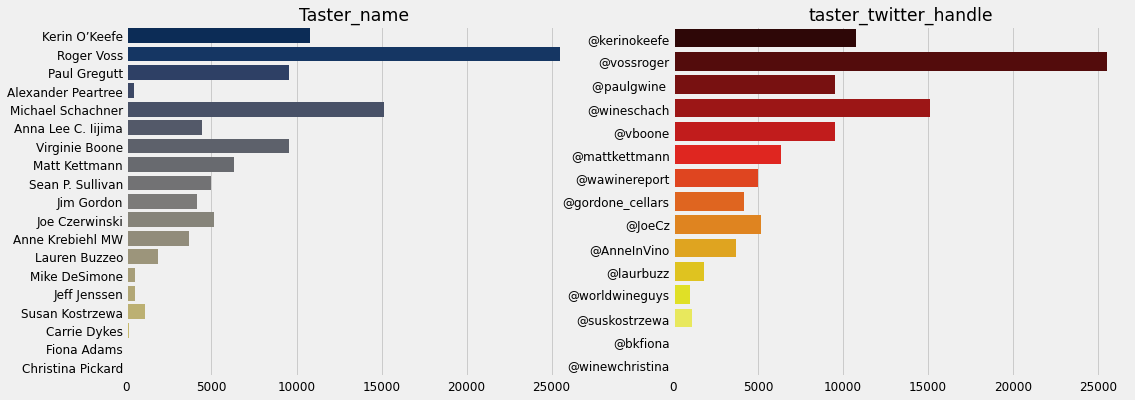

In [28]:
print(wine[["taster_name",'taster_twitter_handle']].describe().T)
f,ax=plt.subplots(1,2,figsize=(16,6))
ax1,ax2=ax.flatten()
sns.countplot(y=wine['taster_name'], palette='cividis', ax=ax1)
ax1.set_title('Taster_name')
ax1.set_xlabel('')
ax1.set_ylabel('')

sns.countplot(y=wine['taster_twitter_handle'], palette='hot',ax=ax2)
ax2.set_title('taster_twitter_handle')
ax2.set_ylabel('')
ax2.set_xlabel('')

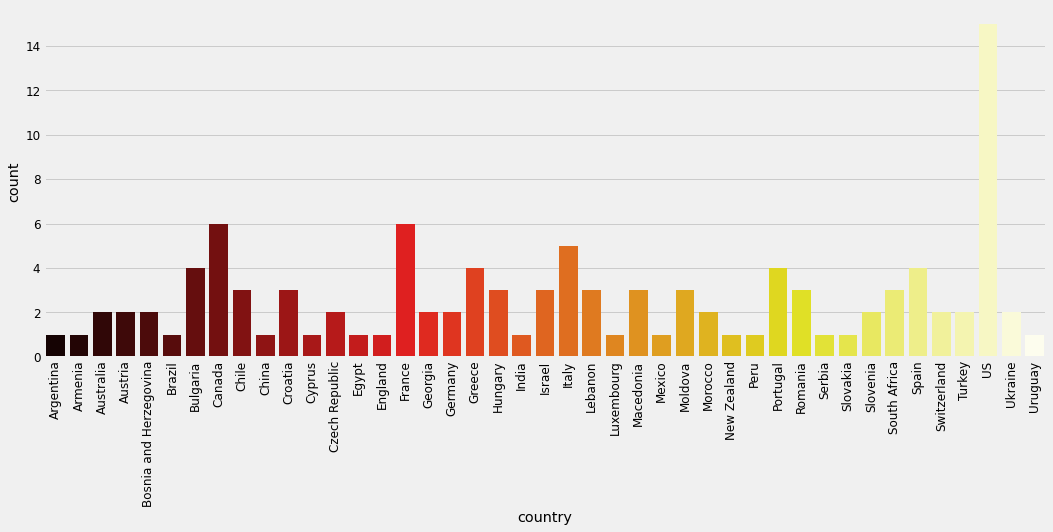

In [29]:
plt.figure(figsize=(16,6))
cnt=wine.groupby(['country','taster_name']).count().reset_index()
sns.countplot(x=cnt['country'], palette='hot')
plt.xticks(rotation=90);

**DESCRIPTION- It tells us about the charasteristics of the wine!**

(-0.5, 399.5, 199.5, -0.5)

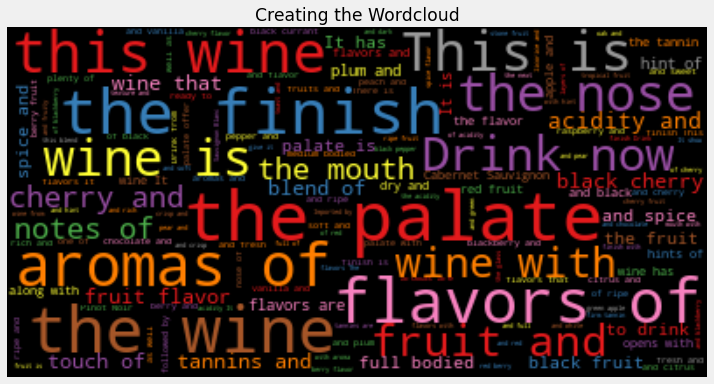

In [30]:
plt.figure(figsize=(16,6))
plt.title('Creating the Wordcloud')
wc=WordCloud(max_words=1000, max_font_size=40, background_color='black', stopwords=STOPWORDS, colormap='Set1')
wc.generate(''.join(wine['description']))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

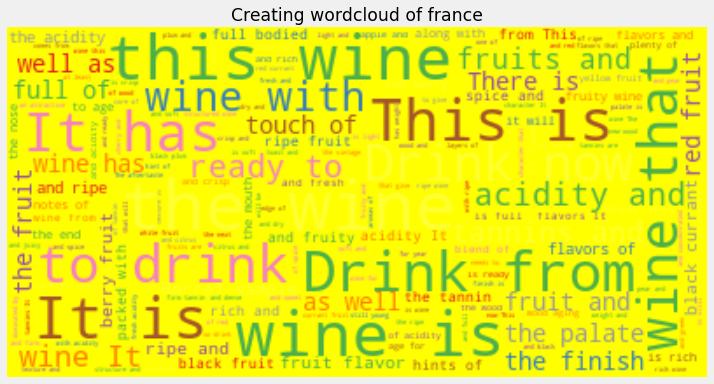

In [31]:
plt.figure(figsize=(16,6))
plt.title('Creating wordcloud of france')
wc=WordCloud(max_words=1000, max_font_size=40, background_color='yellow', stopwords=STOPWORDS, colormap='Set1')
wc.generate(''.join(wine[wine['country']=='France']['description']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# **Implementing the Algorithms**

In [32]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD


In [33]:
wine1=wine.copy()

In [34]:
col=['province','points','variety']
wine1=wine[col]
wine1=wine1.dropna(axis=0)
wine1=wine1.drop_duplicates(['province','variety'])
wine1=wine1[wine1['points']>85]

wine_pivot=wine1.pivot(index='variety', columns='province', values='points').fillna(0)
wine_pivot_matrix=csr_matrix(wine_pivot)

In [35]:
knn=NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')
model_knn=knn.fit(wine_pivot_matrix)

**Prediction(Took help from google)**

In [36]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recmmendation for Rosato:

1: Pinot Nero with distance: 0.34575528990730287
2: Fiano with distance: 0.3622828514133113
3: Pinot Bianco with distance: 0.3678622216679459
4: Trebbiano with distance: 0.4059563207131136
5: Moscato Giallo with distance: 0.43704409971351155
